In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import numpy as np
import matplotlib.pyplot as plt
import torch

from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms

print("Info: import avec succés")

Info: import avec succés


In [6]:
# data augmentation

custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])
print("Info: Data augmentation OK")

Info: Data augmentation OK


In [ ]:
# build model and train

Train_dataset=core.Dataset('train/',transform=custom_transforms)
Test_dataset = core.Dataset('test/')
loader=core.DataLoader(Train_dataset, batch_size=5, shuffle=True)
model = core.Model(['velo', 'trottinette'])
losses = model.fit(loader, Test_dataset, epochs=25, lr_step_size=5, learning_rate=0.001, verbose=True)
print("Info: Build model and train OK")


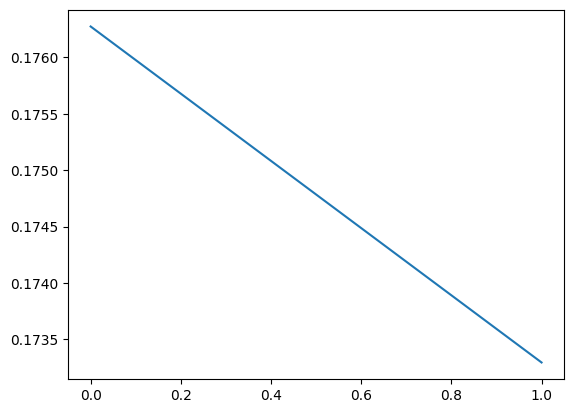

In [8]:
# draw the loss evolution chart

plt.plot(losses)
plt.show()

In [25]:
# save the model
model.save('model_weights1.pth')
model = core.Model.load('model_weights.pth', ['velo', 'trotinette'])
print("Info: Save the model OK")



Info: Save the model OK


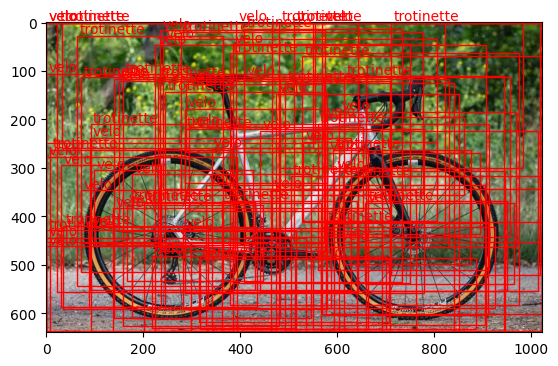

In [26]:
# test on an velo image

image = utils.read_image('testModel/velo.jpg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

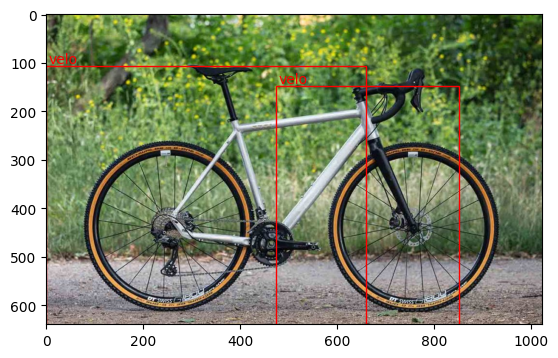

In [31]:
# threshold for a valid detection
thresh=0.308
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

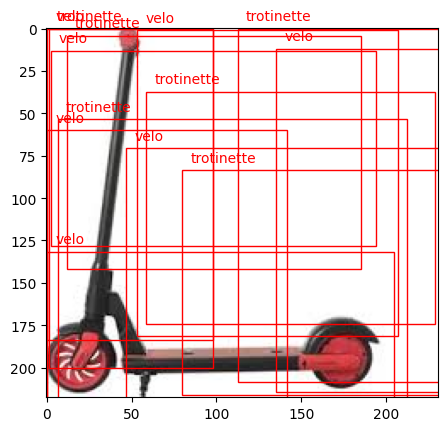

In [32]:
# test on an  trottinette image

image = utils.read_image('testModel/trottinette.jpeg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

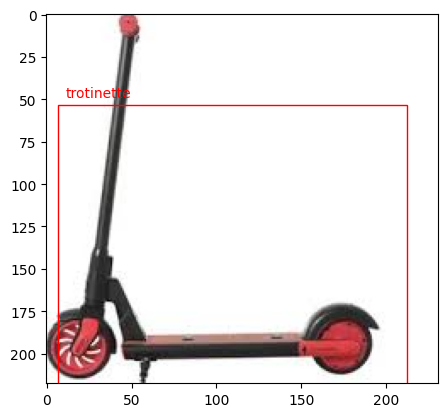

In [34]:


# threshold for a valid detection
thresh=0.47
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)